# ANALYSIS OF ELECTIVE COURSE ENROLLMENT - data science project

# data collection and preprocessing

In [1]:
import pandas as pd
import numpy
from statistics import mode
data = pd.read_csv("DSDATA_final.csv")    #reading csv file 

# Remove duplicates based on specific columns
data = data.drop_duplicates(subset=['Email address', 'Domain of Interest', 'Core Courses taken so far'])

# Print the DataFrame with duplicates removed
print(data)

              Email address  Gender               Domain of Interest  \
0    cs21b1064@iiitdm.ac.in    Male             Software Development   
1      anjanram03@gmail.com    Male             Software Development   
2    cs21b1024@iiitdm.ac.in  Female  Data Science and Data Analytics   
3    cs21b1028@iiitdm.ac.in  Female  Data Science and Data Analytics   
4        sukkunlb@gmail.com  Female             Software Development   
..                      ...     ...                              ...   
133        roshna@gmail.com    Male  Web development/App development   
134  cs21b1089@iiitdm.ac.in    Male  Data Science and Data Analytics   
135  cs21b1090@iiitdm.ac.in    Male                            ML/AI   
136  cs21b1091@iiitdm.ac.in    Male             Software Development   
137  cs21b1092@iiitdm.ac.in    Male                            ML/AI   

                             Core Courses taken so far  \
0    Linear algebra, Calculus, Probability, Differe...   
1    Linear algebra

# Removing missing values
Data Transformation and Feature Engineering:

The code then performs data transformation and feature engineering by extracting information from the "Elective Courses" column. It splits the data into different elective courses, instructors, and feedback and processes it to create a dictionary (elective) to store this information.
#replace missing values with mode
The code calculates the mode (most common value) for each elective course's feedback scores, replacing missing values (None or NaN) with the mode. This is a data analysis and calculation step to handle missing data points.

In [2]:


elective= {}


missing_values = ["NaN"]
data  = pd.read_csv("DSDATA_final.csv",na_values = missing_values)
data.dropna(subset = "Elective Courses",inplace=True)

e_courses=data["Elective Courses"]
for i in e_courses:              #getting different elective courses along with the instuctor and feedback for them from csv file
    lists = i.split("\n")
    for j in lists:
        feedback = j.split(",")
        feedback[1] = feedback[1].replace(" ","")
        elc_fac = feedback[0].split(".")
        elc_fac[1] = elc_fac[1].replace(" ","")
        if elc_fac[1] in elective.keys():
            if feedback[1] not in missing_values:
                elective[elc_fac[1]].append(int(feedback[1]))
            else:
                elective[elc_fac[1]].append(None)
        else:
            list1 = []
            if feedback[1] not in missing_values:
                list1.append(int(feedback[1]))
                elective[elc_fac[1]]=list1
            else:
                list1.append(None)
                elective[elc_fac[1]]=list1           # storing it in elective dict
            
        
        
for key,value in elective.items():
    print(f'{key}:{value}')
    m=0
    for j in value:
        if j is None:
            global final_value
            filtered_value = [x for x in value if x is not None]       #removing NaN values and storing remaining them in data
            m = mode(filtered_value)
            for i in range(len(value)):
                if value[i] is None:
                    value[i] = m                                  #Replacing them with mode values
        
for key,value in elective.items():
    print(f'{key}:{value}')

    
            


WavesandOscillations-NaveenKumar:[4]
PRML-Umarani:[5, 3, 3, 5, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3]
EngineeringOptics-DebolinaMishra:[None, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
EngineeringOptics-VivekKumar:[3, 3, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
PhysicsofMaterials-AshokKumar:[4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5]
MedicalImageAnalysis-Rohini:[4, 5]
RFandMicrovaveCircuitDesign-SrinathReddy:[5]
ProbabilityandStatistics-Subramani:[3]
DesignforArtificialOrgans-Monisha:[5, 4, None, None, 3, 5, 4, 3, None, 3, 5, 3]
BiologyforEngineers-Monisha:[5, 4]
PhysicsofMaterials-Anushree:[4, 4, 4, None, 4, 4, None, None, 3, 4, 3, 4, 4, 4, 4, 4, None, None, 3, 4, 4, 4, 4]
IntroductiontoPhotonics-Srijith:[4, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Bio

# Data Preparation:

The code converts the elective dictionary into a list of lists named data_for_boxplot, where each sublist contains the scores for a specific elective course.
Data Visualization:

The code uses Matplotlib to create a box plot for each elective course. Each box in the plot represents the distribution of scores for a particular elective course.

# Data visualization  (BoxPlot Analysis)

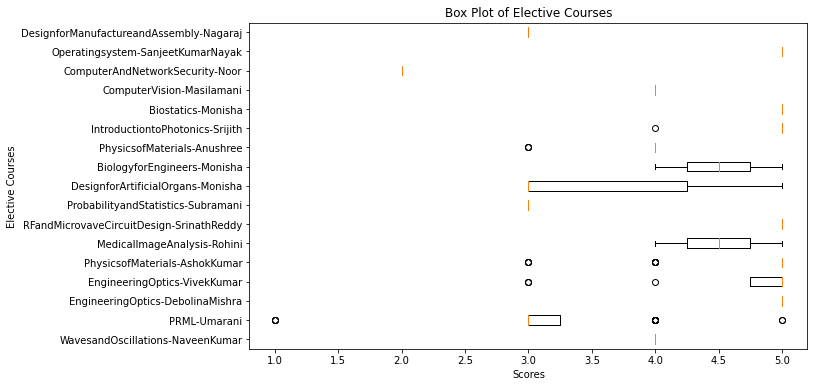

In [3]:
import matplotlib.pyplot as plt

# Convert the elective dictionary to a list of lists for box plots
data_for_boxplot = [scores for course, scores in elective.items()]

# Create a box plot for each elective course
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, vert=False)
plt.yticks(range(1, len(elective) + 1), elective.keys())

# Customize the plot
plt.title('Box Plot of Elective Courses')
plt.xlabel('Scores')
plt.ylabel('Elective Courses')

# Show the plot
plt.show()

# Outlier detection and removal using IQR(Inter Quartile Range)

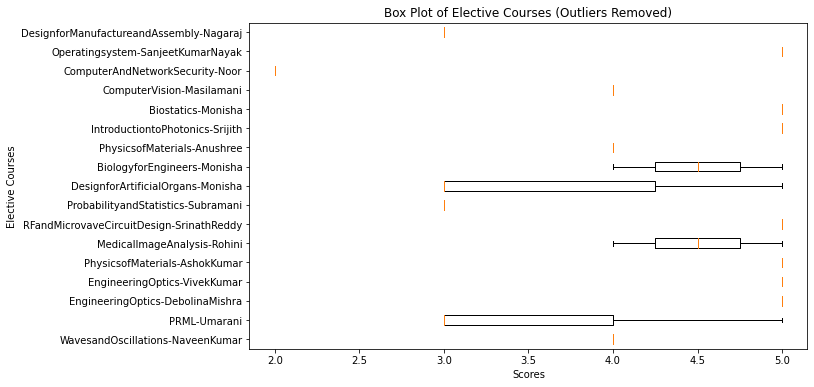

In [4]:
# Function to remove outliers using the IQR method(Inter Quartile Range)
def remove_outliers(scores, threshold=1.5):
    scores.sort()  # Sort the scores in ascending order
    n = len(scores)
    Q1, Q3 = scores[n // 4], scores[3 * n // 4]  # Calculate the quartiles
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return [score for score in scores if lower_bound <= score <= upper_bound]


# Create a cleaned dataset without outliers
cleaned_data = {course: remove_outliers(scores) for course, scores in elective.items()}

# Create a new box plot without outliers
cleaned_data_for_boxplot = [scores for course, scores in cleaned_data.items()]

plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_data_for_boxplot, vert=False)
plt.yticks(range(1, len(cleaned_data) + 1), cleaned_data.keys())
plt.title('Box Plot of Elective Courses (Outliers Removed)')
plt.xlabel('Scores')
plt.ylabel('Elective Courses')
plt.show()


In [5]:
# Continue from your existing code

# Create a dictionary to store aggregated scores
aggregated_scores = {}

# Calculate aggregated scores for each elective course
for key, value in cleaned_data.items():
    #print("list = ",value)
    # Calculate the average score for each elective course
    if value:
        average_score = sum(value) / len(value)               #getting average of feedback
        aggregated_scores[key] = average_score
    else:
        # Handle the case where there are no scores for a specific elective
        aggregated_scores[key] = None

# Print the aggregated scores
for key, score in aggregated_scores.items():
    print(f'{key}: {score}')

    


WavesandOscillations-NaveenKumar: 4.0
PRML-Umarani: 3.3035714285714284
EngineeringOptics-DebolinaMishra: 5.0
EngineeringOptics-VivekKumar: 5.0
PhysicsofMaterials-AshokKumar: 5.0
MedicalImageAnalysis-Rohini: 4.5
RFandMicrovaveCircuitDesign-SrinathReddy: 5.0
ProbabilityandStatistics-Subramani: 3.0
DesignforArtificialOrgans-Monisha: 3.6666666666666665
BiologyforEngineers-Monisha: 4.5
PhysicsofMaterials-Anushree: 4.0
IntroductiontoPhotonics-Srijith: 5.0
Biostatics-Monisha: 5.0
ComputerVision-Masilamani: 4.0
ComputerAndNetworkSecurity-Noor: 2.0
Operatingsystem-SanjeetKumarNayak: 5.0
DesignforManufactureandAssembly-Nagaraj: 3.0


# Data Discretization

Professors in the High Category:
WavesandOscillations-NaveenKumar: 4.0
EngineeringOptics-DebolinaMishra: 5.0
EngineeringOptics-VivekKumar: 5.0
PhysicsofMaterials-AshokKumar: 5.0
MedicalImageAnalysis-Rohini: 4.5
RFandMicrovaveCircuitDesign-SrinathReddy: 5.0
BiologyforEngineers-Monisha: 4.5
PhysicsofMaterials-Anushree: 4.0
IntroductiontoPhotonics-Srijith: 5.0
Biostatics-Monisha: 5.0
ComputerVision-Masilamani: 4.0
Operatingsystem-SanjeetKumarNayak: 5.0

Professors in the Medium Category:
PRML-Umarani: 3.3035714285714284
ProbabilityandStatistics-Subramani: 3.0
DesignforArtificialOrgans-Monisha: 3.6666666666666665
DesignforManufactureandAssembly-Nagaraj: 3.0

Professors in the Low Category:
ComputerAndNetworkSecurity-Noor: 2.0


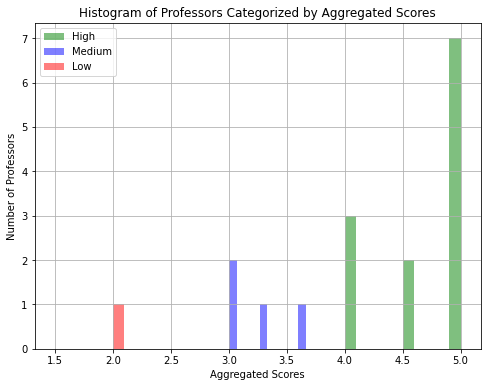

In [6]:
# Define your threshold values for categorization
high_threshold = 4.0  # Professors with scores greater than or equal to this threshold are considered "High"
medium_threshold = 3.0  # Professors with scores greater than or equal to this threshold but below the high threshold are considered "Medium"

# Create dictionaries to store professors in different categories
high_category = {}
medium_category = {}
low_category = {}

# Iterate through aggregated scores and categorize professors
for professor, score in aggregated_scores.items():
    if score is None:
        category = "No Data"  # Handle cases where there's no data for a professor
    elif score >= high_threshold:
        category = "High"
        high_category[professor] = score
    elif score >= medium_threshold:
        category = "Medium"
        medium_category[professor] = score
    else:
        category = "Low"
        low_category[professor] = score

# Print the categorized professors
print("Professors in the High Category:")
for professor, score in high_category.items():
    print(f'{professor}: {score}')

print("\nProfessors in the Medium Category:")
for professor, score in medium_category.items():
    print(f'{professor}: {score}')

print("\nProfessors in the Low Category:")
for professor, score in low_category.items():
    print(f'{professor}: {score}')
    
import matplotlib.pyplot as plt

# Create lists of scores for each category
high_scores = list(high_category.values())
medium_scores = list(medium_category.values())
low_scores = list(low_category.values())

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(high_scores, bins=10, alpha=0.5, color='g', label='High')
plt.hist(medium_scores, bins=10, alpha=0.5, color='b', label='Medium')
plt.hist(low_scores, bins=10, alpha=0.5, color='r', label='Low')

# Customize the plot
plt.title('Histogram of Professors Categorized by Aggregated Scores')
plt.xlabel('Aggregated Scores')
plt.ylabel('Number of Professors')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [38]:
# Calculate the correlation matrix
#correlation_matrix = data.corr()
#print(data)

# Print the correlation matrix
#print(correlation_matrix)

In [7]:
course_list = [
    "Human Computer Interaction -  PSP/OOPS",
    "Design for Artificial Organs - NaN",
    "Digital Systems and Microprocessors -  Digital System Design",
    "Computer Vision -  Linear algebra, Calculus, Probability, Data structures",
    "Bio-inspired Design - None",
    "Computer and Network Security -  Operating Systems, Computer Networks",
    "Medical Image Analysis -  Digital Image Processing",
    "PRML - Linear algebra, Calculus, Probability",
    "Analog IC Design -  Basic Electrical Circuits, Signals and Systems, Analog Circuits",
    "Introduction to Photonics -  Electromagnetics",
    "Materials Fabrication and Characterization Techniques -  Materials for Engineers (MFE)",
    "Energy Harvesting Technology -  Physics of Materials",
    "RF and Microwave Circuit Design -  Principles of Microwave Circuits, Electromagnetic waves",
    "Advanced Functional Materials Devices - NaN",
    "MOSFET Modeling for VLSI Circuit - NaN",
    "Sustainable Manufacturing - Manufacturing Processes",
    "Design of Heat Exchangers -  Engineering Thermodynamics, Fluid Mechanics and Fluid Machinery, Heat transfer",
    "Principles of Vibrations -  Kinematics and Dynamics of Machinery",
    "Laser Based Manufacturing Techniques -  Manufacturing processes",
    "Advanced Mechanics of Materials -  Mechanics of Materials",
    "Design for Additive Manufacturing - NaN",
    "Mass Transfer Industrial Application - NaN",
    "Advanced Machining Processes - NaN",
    "Advanced Functional Materials Devices - NaN",
    "Design for Manufacture and Assembly - None",
    "Probability and Statistics - None",
    "Device Drivers -  PSP/OOPS , Operating Systems",
    "Digital Image Processing -  Linear algebra, Differential Equations, Probability , Calculus, Signals and systems, Digital Electronics",
    "IIOT and Cloud Computing -  Operating Systems, Computer Networks",
    "Biostatistics -  None",
    "Introduction to Biometrics -  None",
    "Wearable Technologies -  Computer Networks",
    "Biosignal Processing and Analysis -  Basic Electrical Circuits",
    "Embedded Kinetic Artwork - NaN",
    "VSLI Technology -  Digital System Design",
    "Wireless Communication -   Analog Circuits, Digital Signal Processing",
    "Genomics and Proteomics -  Biology for Engineers",
    "Introduction to Biomedical Optics -  Engineering Optics",
    "Optical Fibre Sensors -  Engineering Optics",
    "Energy Storages and Energy Vehicle Systems - None",
    "Inverse Problems in Engineering -  Linear algebra, Digital Signal Processing",
    "Interactive Design - None",
    "Biomedical Instrumentation - None",
    "Adaptive Filter Design - NaN",
    "Advanced Semiconductor Devices -  Solid State Electronic Devices",
    "Materials Design for Sensor Systems - NaN",
    "Finite Element Analysis -  Calculus, Differential Equations, Linear algebra",
    "Computer Aided Design and Manufacturing -  None",
    "Computational Fluid Dynamics -  Fluid Mechanics and Fluid Machinery , Linear algebra, Differential Equations",
    "Failure Analysis and Design - None",
    "Vibration Control -  Kinematics and Dynamics of Machinery"
]

course_dict = {}
for course in course_list:
    key, value = course.split(" - ")
    value = value.split(",")
    course_dict[key] = value

# Printing the dictionary
for key, value in course_dict.items():
    print(f"{key}: {value}")


Human Computer Interaction: [' PSP/OOPS']
Design for Artificial Organs: ['NaN']
Digital Systems and Microprocessors: [' Digital System Design']
Computer Vision: [' Linear algebra', ' Calculus', ' Probability', ' Data structures']
Bio-inspired Design: ['None']
Computer and Network Security: [' Operating Systems', ' Computer Networks']
Medical Image Analysis: [' Digital Image Processing']
PRML: ['Linear algebra', ' Calculus', ' Probability']
Analog IC Design: [' Basic Electrical Circuits', ' Signals and Systems', ' Analog Circuits']
Introduction to Photonics: [' Electromagnetics']
Materials Fabrication and Characterization Techniques: [' Materials for Engineers (MFE)']
Energy Harvesting Technology: [' Physics of Materials']
RF and Microwave Circuit Design: [' Principles of Microwave Circuits', ' Electromagnetic waves']
Advanced Functional Materials Devices: ['NaN']
MOSFET Modeling for VLSI Circuit: ['NaN']
Sustainable Manufacturing: ['Manufacturing Processes']
Design of Heat Exchangers: 

# Data Analysis

In [8]:
domain_to_elective_courses = {
    "Software Development": ["Computer Aided Design and Manufacturing", "Failure Analysis and Design", "Interactive Design"],
    "Web development/App development": ["Interactive Design"],
    "ML/AI": ["PRML", "Digital Image Processing"],
    "Data Science and Data Analytics": ["PRML", "Digital Image Processing", "Biostatistics"],
    "Cyber Security": ["Computer and Network Security" ,"IIOT and Cloud Computing"],
    "Network Engineering": ["Wireless Communication", "IIOT and Cloud Computing", "Computer and Network Security"],
    "Cloud Computing": ["IIOT and Cloud Computing"],
    "Software Testing": [],
    "Blockchain Development": [],
    "DevOps (Development and Operations)": ["Computer Aided Design and Manufacturing"],
    "IoT (Internet of Things) Development": ["IIOT and Cloud Computing", "Wearable Technologies"],
    "Database Management": [],
    "Biotechnology": ["Design for Artificial Organs"],
    "Robotics / Robotics and Automation": ["Embedded Kinetic Artwork" ,"Advanced Mechanics of Materials", "Vibration Control", "Design for Additive Manufacturing", "Advanced Machining Processes", "Energy Storages and Energy Vehicle Systems"],
    "Embedded Systems": ["Embedded Kinetic Artwork", "Wireless Communication", "VLSI Technology"],
    "Wireless Communication": ["Wireless Communication", "Computer and Network Security", "IIOT and Cloud Computing"],
    "VLSI (Very Large Scale Integration) Design": ["VLSI Technology", "Digital Systems and Microprocessors", "Wireless Communication"],
    "Quantum Computing": [],
    "Telecommunications": ["Wireless Communication"],
    "Product Management": [],
    "Signal Processing": ["Digital Image Processing", "Control Systems"],
    "Electronics and Circuit Design": ["Analog IC Design"],
    "Control Systems": ["Vibration Control"],
    "Automobiles": ["Advanced Machining Processes", "Energy Storages and Energy Vehicle Systems"],
    "Energy System": ["Energy Harvesting Technology", "Energy Storages and Energy Vehicle Systems"],
    "Manufacturing and Production": ["Sustainable Manufacturing", "Design of Heat Exchangers", "Advanced Machining Processes"],
    "Design Engineer": ["Interactive Design"],
    "Bio medical": ["Biomedical Instrumentation"],
    "Mechatronics": ["Embedded Kinetic Artwork"],
}





In [9]:
lenght = 0  # Initialize the variable before the loop
list_of_max_per = []
list_of_count_100 = []
list_of_courses = []

for index, row in data.iterrows():
    list_dup = []
    # Access each row's data
    DOI = row['Domain of Interest']
    list3 = []
    for key, value in domain_to_elective_courses.items():
       
        if DOI == key:
            for i in value:
                pre = 0
                per = 0
                com_courses = row['Core Courses taken so far'].split(",")
                com_courses = [i.replace(" ", "") for i in com_courses]
                for key1, value1 in course_dict.items():
                    if key1 == i:
                        for cou_req in value1:
                            cou_req = cou_req.replace(" ", "")
                            if cou_req in com_courses and cou_req != 'None':
                                pre = pre + 1
                                per = (pre/len(value1))*100
                            if cou_req == 'None':
                                per = 100
                                break
                        
                    
                                #print(pre,len(value1))
                                
            
                #percentage = (pre / lenght) * 100
                #print(pre, lenght)
                print(i, per)
                if per ==100:
                    list_dup.append(i)
                list3.append(per)
                print(per)
                count_100 = list3.count(100)
    list_of_courses.append(list_dup)
    #print(list3)
    list_of_max_per.append(max(list3))
    list_of_count_100.append(count_100)
    print(index)

# You can access `lenght` outside of the loop now
print("Final value of lenght:", lenght)


Computer Aided Design and Manufacturing 100
100
Failure Analysis and Design 100
100
Interactive Design 100
100
0
Computer Aided Design and Manufacturing 100
100
Failure Analysis and Design 100
100
Interactive Design 100
100
1
PRML 100.0
100.0
Digital Image Processing 66.66666666666666
66.66666666666666
Biostatistics 100
100
2
PRML 100.0
100.0
Digital Image Processing 66.66666666666666
66.66666666666666
Biostatistics 100
100
3
Computer Aided Design and Manufacturing 100
100
Failure Analysis and Design 100
100
Interactive Design 100
100
4
Computer Aided Design and Manufacturing 100
100
Failure Analysis and Design 100
100
Interactive Design 100
100
5
Design for Artificial Organs 0
0
6
Computer Aided Design and Manufacturing 100
100
Failure Analysis and Design 100
100
Interactive Design 100
100
7
PRML 100.0
100.0
Digital Image Processing 66.66666666666666
66.66666666666666
8
PRML 100.0
100.0
Digital Image Processing 66.66666666666666
66.66666666666666
9
PRML 100.0
100.0
Digital Image Proce

In [10]:
print(list_of_max_per)

[100, 100, 100.0, 100.0, 100, 100, 0, 100, 100.0, 100.0, 100.0, 100, 100, 100.0, 0, 100, 100, 100.0, 100.0, 100.0, 0, 100, 100, 100, 100.0, 100.0, 100, 100.0, 100, 100.0, 100, 100.0, 100.0, 100.0, 100.0, 100.0, 100, 100, 100, 100, 100.0, 100.0, 100.0, 0, 100, 100, 100, 100.0, 100.0, 100, 100.0, 100, 100.0, 100, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0, 100, 100, 100, 100.0, 100.0, 100, 100.0, 100, 100.0, 100, 100.0, 100.0, 100.0, 100.0, 100.0, 100, 100, 100.0, 100.0, 100.0, 0, 100, 100, 100, 100.0, 100.0, 100, 100.0, 100, 100.0, 100, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0, 100, 100, 100, 100.0, 100.0, 100, 100.0]


In [11]:
print(list_of_count_100)

[3, 3, 2, 2, 3, 3, 0, 3, 1, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 1]


In [12]:
print(list_of_courses)

[['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['PRML', 'Biostatistics'], ['PRML', 'Biostatistics'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], [], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['PRML'], ['PRML'], ['PRML'], ['Interactive Design'], ['Energy Storages and Energy Vehicle Systems'], ['PRML', 'Biostatistics'], [], ['Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Wireless Communication'], ['PRML'], ['PRML'], [], ['Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Interactive Design']

In [13]:
# Add a new attribute
#data['max_per_prerequisite'] = list_of_max_per
data['number_of_courses'] = list_of_count_100
data['electives_possible'] = list_of_courses

# Save the modified dataset (optional)
data.to_csv('modified_dataset.csv', index=False)

In [14]:
df = pd.read_csv("modified_dataset.csv")
print(df)

              Email address  Gender               Domain of Interest  \
0    cs21b1064@iiitdm.ac.in    Male             Software Development   
1      anjanram03@gmail.com    Male             Software Development   
2    cs21b1024@iiitdm.ac.in  Female  Data Science and Data Analytics   
3    cs21b1028@iiitdm.ac.in  Female  Data Science and Data Analytics   
4        sukkunlb@gmail.com  Female             Software Development   
..                      ...     ...                              ...   
130        roshna@gmail.com    Male  Web development/App development   
131  cs21b1089@iiitdm.ac.in    Male  Data Science and Data Analytics   
132  cs21b1090@iiitdm.ac.in    Male                            ML/AI   
133  cs21b1091@iiitdm.ac.in    Male             Software Development   
134  cs21b1092@iiitdm.ac.in    Male                            ML/AI   

                             Core Courses taken so far  \
0    Linear algebra, Calculus, Probability, Differe...   
1    Linear algebra

In [15]:
completed_electives = data['Elective Courses']
list_for_com_cou = []
for row in completed_electives:
    list_dup = []
    elcs = row.split("\n")
    for i in elcs:
        no_elc = i.split(' - ')
        elective_name = no_elc[0].split(".")
        list_dup.append(elective_name[1])
    list_for_com_cou.append(list_dup)
print(list_for_com_cou)

[['Waves and Oscillations', 'PRML'], ['Engineering Optics'], ['Engineering Optics'], ['Engineering Optics'], ['Physics of Materials', 'Medical Image Analysis', 'RF and Microvave Circuit Design'], ['Engineering Optics', 'Probability and Statistics'], ['Engineering Optics', 'Design for Artificial Organs'], ['Physics of Materials', 'PRML'], ['Biology for Engineers'], ['Physics of Materials', 'PRML'], ['Physics of Materials', 'Introduction to Photonics'], ['Biology for Engineers', 'Design for Artificial Organs -Monisha, 4'], ['Medical Image Analysis'], ['Engineering Optics'], ['Physics of Materials', 'PRML'], ['Physics of Materials'], ['Biostatics'], ['Physics of Materials'], ['Computer Vision'], ['Engineering Optics', 'Introduction to Photonics'], ['Computer And Network Security'], ['Physics of Materials', 'PRML'], ['Engineering Optics', 'PRML'], ['PRML'], ['Physics of Materials', 'PRML'], ['Physics of Materials', 'PRML'], ['Physics of Materials', 'PRML'], ['Physics of Materials', 'PRML']

In [16]:
list_of_rem = []
list_of_len_rem = []
for i in range(len(list_of_courses)):
    list_for_rem_cou = []
    for j in list_of_courses[i]:
        if j not in list_for_com_cou[i]:
            list_for_rem_cou.append(j)
    list_of_rem.append(list_for_rem_cou)
for i in list_of_rem:
    list_of_len_rem.append(len(i))
    
    

In [17]:
print(list_of_rem)


[['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['PRML', 'Biostatistics'], ['PRML', 'Biostatistics'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], [], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['PRML'], [], ['PRML'], ['Interactive Design'], ['Energy Storages and Energy Vehicle Systems'], ['PRML', 'Biostatistics'], [], ['Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Wireless Communication'], ['PRML'], ['PRML'], [], ['Interactive Design'], ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design'], ['Interactive Design'], ['Bi

In [18]:
print(list_of_len_rem)

[3, 3, 2, 2, 3, 3, 0, 3, 1, 0, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 0, 1, 0, 3, 0, 3, 1, 0, 1, 2, 1, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 0, 1, 0, 3, 0, 3, 1, 0, 1, 2, 1, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0]


In [19]:
data['remaining_courses'] = list_of_len_rem
data['rem_cou_names'] = list_of_rem

# Save the modified dataset (optional)
data.to_csv('modified_dataset.csv', index=False)

In [20]:
df = pd.read_csv("modified_dataset.csv")
print(df)

              Email address  Gender               Domain of Interest  \
0    cs21b1064@iiitdm.ac.in    Male             Software Development   
1      anjanram03@gmail.com    Male             Software Development   
2    cs21b1024@iiitdm.ac.in  Female  Data Science and Data Analytics   
3    cs21b1028@iiitdm.ac.in  Female  Data Science and Data Analytics   
4        sukkunlb@gmail.com  Female             Software Development   
..                      ...     ...                              ...   
130        roshna@gmail.com    Male  Web development/App development   
131  cs21b1089@iiitdm.ac.in    Male  Data Science and Data Analytics   
132  cs21b1090@iiitdm.ac.in    Male                            ML/AI   
133  cs21b1091@iiitdm.ac.in    Male             Software Development   
134  cs21b1092@iiitdm.ac.in    Male                            ML/AI   

                             Core Courses taken so far  \
0    Linear algebra, Calculus, Probability, Differe...   
1    Linear algebra

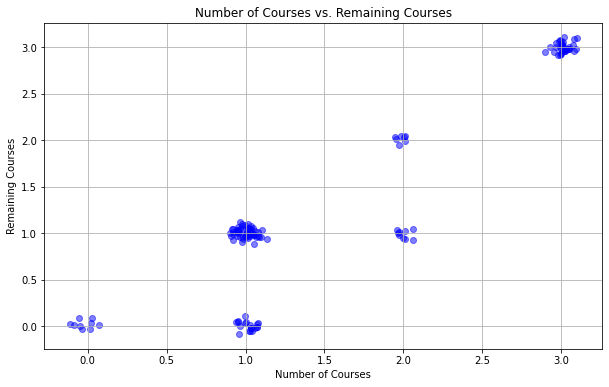

In [21]:
import seaborn as sns
import numpy as np
# Add jitter to the data points to separate overlapping points
jittered_x = data['number_of_courses'] + np.random.normal(0, 0.05, len(data))
jittered_y = data['remaining_courses'] + np.random.normal(0, 0.05, len(data))

# Plot the graph with jittered points and transparency
plt.figure(figsize=(10, 6))
plt.scatter(jittered_x, jittered_y, color='blue', marker='o', alpha=0.5)  # Use alpha for transparency
plt.xlabel('Number of Courses')
plt.ylabel('Remaining Courses')
plt.title('Number of Courses vs. Remaining Courses')
plt.grid(True)

# Show the plot
plt.show()






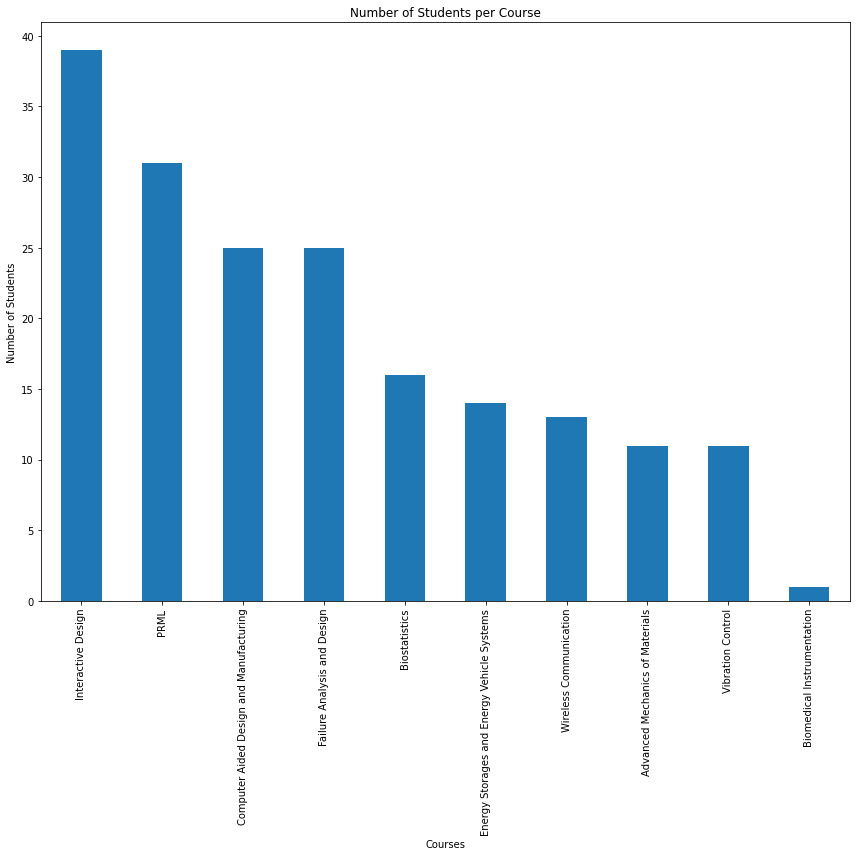

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Your provided data
data_cou = list_of_rem
# Flatten the list of courses
courses = [course for sublist in data_cou for course in sublist]

# Count the occurrences of each course
course_counts = pd.Series(courses).value_counts()

# Create a bar chart
plt.figure(figsize=(12, 12))
course_counts.plot(kind='bar')
plt.title('Number of Students per Course')
plt.xlabel('Courses')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()



# ML model using Multinomial Naive Bayes Text Classification Model. 
This type of model is often used for tasks like sentiment analysis, spam detection, topic classification, and other text classification problems where the input features are textual data, and the goal is to categorize text documents into predefined categories or labels.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('modified_dataset.csv')

# Split the data into training and testing sets
X = data['Domain of Interest']  # Input features
y = data['rem_cou_names']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a text classification model (MultinomialNB)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the training and testing sets
y_train_pred = clf.predict(X_train_tfidf)
y_test_pred = clf.predict(X_test_tfidf)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.75
Testing Accuracy: 0.7407407407407407


In [37]:
user_input = input("Enter your Domain of Interest")  # This should be the text you want to classify

# Vectorize the user input using the same TfidfVectorizer
user_input_tfidf = tfidf_vectorizer.transform([user_input])

# Use the trained classifier to make predictions
predicted_category = clf.predict(user_input_tfidf)

# Print the predicted category
print(f"Predicted Category: {predicted_category[0]}")

Enter your Domain of InterestSoftware Development
Predicted Category: ['Computer Aided Design and Manufacturing', 'Failure Analysis and Design', 'Interactive Design']
